# Physical properties of Ou 5

In [73]:
import numpy as np
import pyneb as pn
from astropy import constants
import astropy.units as u
import matplotlib.pyplot as plt
import seaborn as sns

## Ionization balance for H and He

Note it is necessary to set these data files before we create the RecAtoms, otherwise the total recombination rate does not work

In [2]:
pn.atomicData.setDataFile('h_i_trc_SH95-caseB.dat')
pn.atomicData.setDataFile('he_ii_trc_SH95-caseB.dat')

### Temperature and density samples

In [3]:
temps = np.array([500, 1000, 6000, 10000, 13000, 15000, 20000])
dens = np.array([100, 1000, 10000])

### H alpha emission coefficient versus temperature

We need this to estimate the emission measure of the differernt nebular components from the observed surface brightness

In [4]:
H1 = pn.RecAtom('H', 1)

Case B recombination rate

In [5]:
alpha_H_B = H1.getTotRecombination(tem=temps[:, None], den=dens)
alpha_H_B 

array([[2.49300000e-12, 2.57300000e-12, 2.72000000e-12],
       [1.51200000e-12, 1.53500000e-12, 1.57900000e-12],
       [3.96037430e-13, 3.96922668e-13, 3.98583076e-13],
       [2.58500000e-13, 2.58800000e-13, 2.59400000e-13],
       [2.07774355e-13, 2.08031331e-13, 2.08231331e-13],
       [1.83600000e-13, 1.83700000e-13, 1.83900000e-13],
       [1.42800000e-13, 1.42900000e-13, 1.43000000e-13]])

H alpha emissivity in erg.s-1.cm3

In [6]:
j_6563 = H1.getEmissivity(tem=temps, den=dens, label="3_2")
j_6563

array([[4.54200000e-24, 4.61200000e-24, 4.75800000e-24],
       [2.61600000e-24, 2.62800000e-24, 2.65500000e-24],
       [5.65600000e-25, 5.65150000e-25, 5.64500000e-25],
       [3.53600000e-25, 3.53400000e-25, 3.53000000e-25],
       [2.75338462e-25, 2.75138462e-25, 2.74884615e-25],
       [2.39800000e-25, 2.39600000e-25, 2.39500000e-25],
       [1.80700000e-25, 1.80600000e-25, 1.80500000e-25]])

Density dependence (columns) is negligible: 2 or 3% positive gradient from 100 pcc to 1e4 pcc at low T, 0.02% negative gradient at high T. 

So constant pressure will have a slighty steeper temperature dependence than constant density

Energy of an H alpha photon

In [7]:
E_6563 = (constants.c * constants.h / (H1.getWave(3, 2) * u.angstrom)).cgs
E_6563.value

3.0268193154262724e-12

Fraction of Case B recombinations that produce H alpha

In [8]:
f_6563 = j_6563 / E_6563.value / alpha_H_B
f_6563

array([[0.60191942, 0.59219265, 0.57792175],
       [0.57160952, 0.56562746, 0.55551514],
       [0.47183122, 0.47040435, 0.46790598],
       [0.4519238 , 0.45114461, 0.44959165],
       [0.43781279, 0.43695434, 0.43613191],
       [0.43150915, 0.43091455, 0.43026626],
       [0.41806465, 0.4175409 , 0.41701788]])

So the fraction $f_{6563}$ is about 0.6 for T <= 1000 K, as opposed to 0.45 for 10,000 K.  And with almost no dependence on density. 

We also need to check the variation between 6000 K, third row (mean T for Ou 5) and 15,000 K, penultimate row (T assumed in Harman & Seaton 1966 for Zanstra temperatures). 

This is f = 0.47 @ 6000 K versus f = 0.43 @ 15000 K

So Lambda(H I) should be reduced (multiply by factor 0.43/0.47 = 0.91) since we are getting relatively more H alpha per recombination.

And do the Balmer decrement

In [9]:
j_4861 = H1.getEmissivity(tem=temps, den=dens, label="4_2")
j_6563 / j_4861

array([[3.98071867, 3.85296575, 3.67981439],
       [3.66181411, 3.58869316, 3.48288076],
       [2.99417681, 2.98153521, 2.96092316],
       [2.86315789, 2.85691188, 2.84677419],
       [2.81399371, 2.80927734, 2.8013609 ],
       [2.78837209, 2.78378064, 2.77809999],
       [2.74661803, 2.74343005, 2.73941418]])

### He++ recombination coefficient versus temperature

In [10]:
He2 = pn.RecAtom("He", 2)

In [11]:
alpha_He_B = He2.getTotRecombination(tem=temps[:, None], den=dens)
alpha_He_B

array([[1.26200000e-11, 1.31400000e-11, 1.41200000e-11],
       [7.82600000e-12, 7.98400000e-12, 8.27700000e-12],
       [2.25362013e-12, 2.25992217e-12, 2.27332489e-12],
       [1.53300000e-12, 1.53600000e-12, 1.54100000e-12],
       [1.26064500e-12, 1.26164500e-12, 1.26464500e-12],
       [1.12800000e-12, 1.12900000e-12, 1.13200000e-12],
       [9.03000000e-13, 9.03500000e-13, 9.04800000e-13]])

In [12]:
j_6560 = He2.getEmissivity(tem=temps, den=dens, label="6_4")
j_6560

array([[2.43300000e-24, 2.54000000e-24, 2.71500000e-24],
       [1.46400000e-24, 1.49100000e-24, 1.53400000e-24],
       [3.30350000e-25, 3.30150000e-25, 3.29350000e-25],
       [2.02700000e-25, 2.02400000e-25, 2.01700000e-25],
       [1.55361538e-25, 1.55061538e-25, 1.54507692e-25],
       [1.33900000e-25, 1.33600000e-25, 1.33200000e-25],
       [9.84600000e-26, 9.82900000e-26, 9.79700000e-26]])

In [13]:
He2.getWave(6, 4)

6559.876637343726

Energy of an He II 6560 photon

In [14]:
E_6560 = (constants.c * constants.h / (He2.getWave(6, 4) * u.angstrom)).cgs
E_6560.value

3.0281756303778526e-12

Fraction of He++ Case B recombinations that produce He II 6560

In [15]:
f_6560 = j_6560 / E_6560.value / alpha_He_B
f_6560

array([[0.06366514, 0.06383477, 0.06349713],
       [0.06177606, 0.0616703 , 0.06120281],
       [0.04840749, 0.04824327, 0.04784264],
       [0.04366471, 0.04351492, 0.04322373],
       [0.04069768, 0.0405869 , 0.04034599],
       [0.03920039, 0.03907792, 0.03885767],
       [0.03600734, 0.03592528, 0.03575687]])

So this is about 11 times smaller than for H alpha, with a very similar T dependence

#### Repeat for the 4686 line

In [16]:
j_4686 = He2.getEmissivity(tem=temps, den=dens, label="4_3")
j_4686

array([[2.25200000e-23, 2.27100000e-23, 2.31800000e-23],
       [1.27400000e-23, 1.26800000e-23, 1.26400000e-23],
       [2.52200000e-24, 2.50550000e-24, 2.47900000e-24],
       [1.51600000e-24, 1.50800000e-24, 1.49500000e-24],
       [1.15458462e-24, 1.14979231e-24, 1.14127692e-24],
       [9.93200000e-25, 9.89100000e-25, 9.82200000e-25],
       [7.29200000e-25, 7.26600000e-25, 7.22400000e-25]])

In [17]:
He2.getWave(4, 3)

4685.55411681253

In [18]:
E_4686 = (constants.c * constants.h / (He2.getWave(4, 3) * u.angstrom)).cgs
E_4686.value

4.2395110751602196e-12

In [19]:
f_4686 = j_4686 / E_4686.value / alpha_He_B
f_4686

array([[0.42091389, 0.40766741, 0.38722462],
       [0.3839846 , 0.37461309, 0.36021214],
       [0.26396637, 0.2615081 , 0.25721675],
       [0.23326054, 0.23157643, 0.22883517],
       [0.21603155, 0.21496436, 0.21286616],
       [0.20768821, 0.20664766, 0.20466224],
       [0.19047726, 0.18969307, 0.1883256 ]])

So this is about half the H alpha value at warm temperatures, with a bit steeper T dependence so it is 2/3 at cool temperatures. It also has more of a density dependence than the other fractions, but it is still not significant.

This is f = 0.26 @ 6000 K versus f = 0.21 @ 15000 K

So Lambda(He II) should be reduced (multiply by factor 0.21/0.26 = 0.79) since we are getting relatively more H alpha per recombination.

Now check values that Harman & Seaton are actually using:


In [20]:
hs64_f4686 = [29.4/154, 14.8/90.1]
np.mean(hs64_f4686), np.mean(hs64_f4686)/0.26

(0.17758551104833015, 0.6830211963397314)

So actually they were using even lower values, so I should multiply Lambda by 0.68

### Estimating Q_3 

The H alpha luminosity can be estimated from the extinction-corrected flux (see calculation in org file)

In [21]:
Flux_ha = 3.8e-12 * u.erg / u.s / u.cm**2

Uncertainty in flux is about 40%

In [22]:
D_kpc = 4
L_ha = (Flux_ha * (4 * np.pi * (D_kpc * u.kpc)**2)).cgs
L_ha 

<Quantity 7.27469071e+33 erg / s>

Or in solar units

In [23]:
L_ha / constants.L_sun.cgs

<Quantity 1.90038942>

Observed 100 F(4686)/Hb = 71 from Corradi (2015) and that hardly needs correcting for extinction. We can just use the theoretical Ha/Hb ratio = 2.9 at warm temperatures, although it can be up to 4 at cool temperatures. We use 3

In [24]:
L_4686 = L_ha * 0.71 / 3
L_4686

<Quantity 1.7216768e+33 erg / s>

In [25]:
Q_3 = alpha_He_B * L_4686 / (j_4686 * u.erg)

In [26]:
Q_3.value

array([[9.64811778e+44, 9.96161743e+44, 1.04875222e+45],
       [1.05760146e+45, 1.08405896e+45, 1.12739865e+45],
       [1.53846372e+45, 1.55292579e+45, 1.57883450e+45],
       [1.74098320e+45, 1.75364428e+45, 1.77465147e+45],
       [1.87983039e+45, 1.88916286e+45, 1.90778409e+45],
       [1.95534780e+45, 1.96519372e+45, 1.98425793e+45],
       [2.13202709e+45, 2.14084089e+45, 2.15638589e+45]])

So it about 1e45 per second. Now to check against the cloudy models. **Note that it will scale with the distance as $D^2$ so it would be two times smaller for the Jones distance**

We should use the third row, since that corresponds to the mean temperature of 6000 K

Repeat for the 6560 line. We get the ratio over H alpha from the 04-01 notebook. Multiplying the scale that we found when we normalized the co-added bgsub image by the sumscale that we calculated when plotting the spatial profile. This means that we are calculating the ratio for the inner lobes+ring close to the axis

In [27]:
R_6560_6563 = (3.2187782450199 / 66.59484446105931) * (3.8117776 / 5.6593223)
R_6560_6563

0.0325546907527186

In [28]:
L_6560 = L_ha * R_6560_6563
L_6560

<Quantity 2.36825306e+32 erg / s>

In [29]:
Q_3r = alpha_He_B * L_6560/ (j_6560 * u.erg)
Q_3r.value

array([[1.22841569e+45, 1.22515139e+45, 1.23166605e+45],
       [1.26598009e+45, 1.26815107e+45, 1.27783772e+45],
       [1.61560248e+45, 1.62110181e+45, 1.63467698e+45],
       [1.79108631e+45, 1.79725134e+45, 1.80935943e+45],
       [1.92166376e+45, 1.92690893e+45, 1.93841442e+45],
       [1.99506307e+45, 2.00131565e+45, 2.01265951e+45],
       [2.17198102e+45, 2.17694236e+45, 2.18719544e+45]])

In [30]:
Q_3r.value / Q_3.value

array([[1.27321796, 1.22987195, 1.17441091],
       [1.19702944, 1.16981744, 1.13343911],
       [1.05014012, 1.04390165, 1.03536943],
       [1.02877863, 1.02486654, 1.01955762],
       [1.0222538 , 1.01998032, 1.01605545],
       [1.02031111, 1.01838085, 1.01431345],
       [1.01873988, 1.01686322, 1.01428758]])

So this gives a very similar value if T is warm, up to about 1.2 times larger if T is cool. So that is very gratifying that it comes out the same.

## O II recombination lines

In [32]:
o2r = pn.RecAtom("O", 2)
o2r

Atom O2 from o_ii_rec_SSB17-B-opt.hdf5

### V1 multiplet 

In [43]:
e4651 = o2r.getEmissivity(tem=temps[:, None], den=dens, label="4650.84") 

In [47]:
e4661 = o2r.getEmissivity(tem=temps[:, None], den=dens, label="4661.63") 

In [44]:
e4649 = o2r.getEmissivity(tem=temps[:, None], den=dens, label="4649.13") 

### Density-sensitive ratios within V1

In [57]:
dens

array([  100,  1000, 10000])

In [45]:
e4649/e4651

array([[1.48948323, 2.34359573, 2.97163187],
       [1.17700258, 2.26752072, 3.37561943],
       [0.48537653, 1.46151136, 3.54532978],
       [0.37503019, 1.25715471, 3.50958904],
       [0.33211365, 1.17403129, 3.51315256],
       [0.31224641, 1.13457521, 3.52454509],
       [0.28286294, 1.07354041, 3.55908353]])

In [48]:
e4649/e4661

array([[1.62798373, 2.30417077, 2.86005395],
       [1.32605531, 2.20278184, 3.15955473],
       [0.60141304, 1.47115535, 3.23224424],
       [0.47492355, 1.28869048, 3.19053549],
       [0.42475978, 1.2144536 , 3.18536599],
       [0.40110197, 1.17915355, 3.18763967],
       [0.36573696, 1.12430002, 3.20097433]])

In [46]:
r4649_4651_obs = 3.81 / 1.80
r4649_4651_obs

2.1166666666666667

In [58]:
r4649_4661_obs = 3.81 / 1.89
r4649_4661_obs

2.015873015873016

Error is +/- 25% so 1.5 to 2.5.  

In [89]:
densfine = np.geomspace(100., 10000., 501)
r_1e4K = (
    o2r.getEmissivity(tem=10000.0, den=densfine, label="4649.13") 
    / o2r.getEmissivity(tem=10000.0, den=densfine, label="4661.63")
)
r_1e3K = (
    o2r.getEmissivity(tem=1000.0, den=densfine, label="4649.13") 
    / o2r.getEmissivity(tem=1000.0, den=densfine, label="4661.63")
)

Look at densities that give ratios within the observed limits. 

First for T=1e4 K:

In [90]:
densfine[(r_1e4K > 1.5) & (r_1e4K < 2.5)], densfine[(r_1e4K > 1.97) & (r_1e4K < 2.07)]

(array([1330.45441798, 1342.76496114, 1355.18941235, 1367.7288256 ,
        1380.3842646 , 1393.15680295, 1406.04752413, 1419.05752169,
        1432.18789927, 1445.43977075, 1458.81426028, 1472.31250243,
        1485.93564229, 1499.6848355 , 1513.56124844, 1527.56605824,
        1541.70045295, 1555.96563161, 1570.36280433, 1584.89319246,
        1599.55802861, 1614.35855683, 1629.29603264, 1644.37172321,
        1659.58690744, 1674.94287603, 1690.44093164, 1706.082389  ,
        1721.86857499, 1737.80082875, 1753.88050184, 1770.10895832,
        1786.48757485, 1803.01774086, 1819.70085861, 1836.53834335,
        1853.53162341, 1870.68214037, 1887.9913491 , 1905.46071796,
        1923.09172891, 1940.88587759, 1958.84467351, 1976.96964011,
        1995.26231497, 2013.72424986, 2032.35701094, 2051.16217883,
        2070.14134879, 2089.29613085, 2108.62814993, 2128.13904598,
        2147.83047413, 2167.70410482, 2187.76162395, 2208.00473302,
        2228.43514927, 2249.05460584, 2269.86485

So that gives n = 2400 - 1000 + 1600

Now for T=1e3 K:

In [91]:
densfine[(r_1e3K > 1.5) & (r_1e3K < 2.5)], densfine[(r_1e3K > 2.0) & (r_1e3K < 2.04)]

(array([ 214.78304741,  216.77041048,  218.77616239,  220.8004733 ,
         222.84351493,  224.90546058,  226.98648519,  229.08676528,
         231.20647902,  233.34580623,  235.50492839,  237.68402866,
         239.8832919 ,  242.10290467,  244.34305527,  246.60393372,
         248.88573183,  251.18864315,  253.51286305,  255.85858869,
         258.22601906,  260.615355  ,  263.02679919,  265.4605562 ,
         267.91683248,  270.39583641,  272.89777828,  275.42287033,
         277.97132678,  280.5433638 ,  283.13919958,  285.75905434,
         288.40315031,  291.07171181,  293.7649652 ,  296.48313895,
         299.22646366,  301.99517204,  304.78949896,  307.60968147,
         310.45595881,  313.32857243,  316.22776602,  319.15378551,
         322.10687913,  325.08729739,  328.09529311,  331.13112148,
         334.19504003,  337.28730866,  340.4081897 ,  343.5579479 ,
         346.73685045,  349.94516703,  353.18316979,  356.45113343,
         359.74933516,  363.07805477,  366.43757

So that gives n = 725 - 500 + 1000

Note that both of these disagree with Corradi who have 3900 with no errors

In [112]:
tempsfine = np.geomspace(100, 25000., 701)
r4649_4661_fine = (
    o2r.getEmissivity(tem=tempsfine, den=densfine, label="4649.13") 
    / o2r.getEmissivity(tem=tempsfine, den=densfine, label="4661.63")
)

Text(0, 0.5, 'Density, cm$^{-3}$')

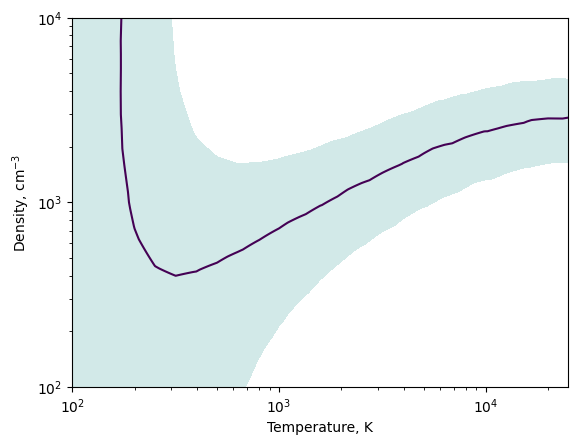

In [113]:
fig, ax = plt.subplots()
conts = ax.contourf(tempsfine, densfine, r4649_4661_fine.T, levels=[1.5, 2.5], alpha=0.2)
ax.contour(tempsfine, densfine, r4649_4661_fine.T, levels=[2.02])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Temperature, K")
ax.set_ylabel(r"Density, cm$^{-3}$")


### V48 multiplet

In [114]:
e4089 = o2r.getEmissivity(tem=temps[:, None], den=dens, label="4089.29") 

### V15 multiplet

In [115]:
e4591 = o2r.getEmissivity(tem=temps[:, None], den=dens, label="4590.97")
e4189 = o2r.getEmissivity(tem=temps[:, None], den=dens, label="4189.79")

### T-sensitive ratios

In [116]:
temps[:, None]

array([[  500],
       [ 1000],
       [ 6000],
       [10000],
       [13000],
       [15000],
       [20000]])

First the V1 / V48 ratio

In [117]:
e4649 / e4089

array([[2.26581999, 2.37019829, 2.33007181],
       [2.33191126, 2.52857143, 2.48976608],
       [2.75742216, 3.50892679, 3.45617679],
       [2.98539023, 4.03595206, 3.97517455],
       [3.15468196, 4.38783581, 4.32961799],
       [3.27230103, 4.62165238, 4.56497455],
       [3.63183578, 5.24555765, 5.17756477]])

So, yes: high values of this ratio imply high temperatures, and high density too

Next the V1 / V15 ratio

In [118]:
e4649 / e4591

array([[301.80441616, 228.72343038, 215.84816849],
       [ 60.18498128,  34.77808599,  30.16829052],
       [  4.39535878,   4.23075378,   4.31530418],
       [  3.06009852,   3.43806715,   3.69963899],
       [  2.68599306,   3.24970621,   3.5950581 ],
       [  2.55127029,   3.20914995,   3.6011883 ],
       [  2.44419137,   3.28381031,   3.77328231]])

So for this one, high values imply low T

Therefore, the observed 3-sigma lower limits 4649 / 4089 > 2.9 **and** 4649 / 4591 > 2.9 would tightly constrain T = 10000 K at n=100.  But at high density, n=1000, we have any T > 3000 K being consistent. 

### Combine constraints on n and T

Now look on the fine grid at all these ratios

In [119]:
r4649_4089_fine = (
    o2r.getEmissivity(tem=tempsfine, den=densfine, label="4649.13") 
    / o2r.getEmissivity(tem=tempsfine, den=densfine, label="4089.29")
)
r4649_4591_fine = (
    o2r.getEmissivity(tem=tempsfine, den=densfine, label="4649.13") 
    / o2r.getEmissivity(tem=tempsfine, den=densfine, label="4590.97")
)


Text(0.5, 0, 'Density, cm$^{-3}$')

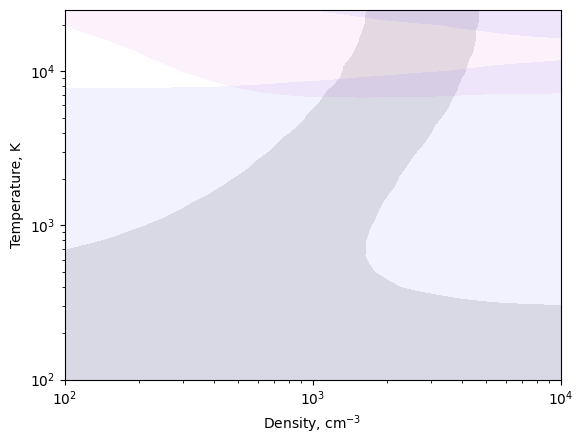

In [133]:
fig, ax = plt.subplots()

ax.contourf(densfine, tempsfine, r4649_4661_fine, levels=[1.5, 2.5], colors="k", alpha=0.1)
#ax.contour(densfine, tempsfine, r4649_4661_fine, levels=[2.02])

limit_sigma = 3 # How many times noise sigma do we want to consider for upper/lower limits
obs_rms_noise = 0.35 # Typical observational uncertainty in O II line strengths in Corradi+2015
obs_4649 = 3.81 # Observed O II 4649 on scale of Hb = 100
ratio_lower_limit = obs_4649 / obs_rms_noise / limit_sigma
ax.contourf(densfine, tempsfine, r4649_4089_fine, levels=[ratio_lower_limit, 1000], colors="m", alpha=0.05)
ax.contourf(densfine, tempsfine, r4649_4591_fine, levels=[ratio_lower_limit, 1000], colors="b", alpha=0.05)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Temperature, K")
ax.set_xlabel(r"Density, cm$^{-3}$")


I have dropped the 4649/4591 ratio since the current lower limit is not informative

The combined confidence area implies that T > 2500 K and n = 600 to 2000 pcc

But it would be better to do the forward calculation of the line ratios from the cloudy model

If the T were as low as 1000 K, then 4089 should be as bright as the V1 components 4639, 4651, and 4661 (with 100 Flam/Hb = 1.5 approx).  That should make it easy to measure, but this part of the spectrum is not shown in the paper, so we do not know if there is some extra noise or other interference there. 

# Sources of atomic data

In [ ]:
H1.printSources()

In [33]:
o2r.printSources()

Storey, P. J., Sochi, T., & Bastin, R., 2017, arXiv170309982S


In [34]:
He2.printSources()

Storey and Hummer 1995
Ref.  of NIST 2014 (try this: http://physics.nist.gov/cgi-bin/ASBib1/get_ASBib_ref.cgi?db=el&db_id=&comment_code=&element=He&spectr_charge=2&
Ref. 3620c107 of NIST 2014 (try this: http://physics.nist.gov/cgi-bin/ASBib1/get_ASBib_ref.cgi?db=el&db_id=3620c107&comment_code=&element=He&spectr_charge=2&


In [35]:
pn.atomicData.getAllAvailableFiles("He2")

['* 3he_ii_atom_cloudy.dat',
 '* 3he_ii_coll_cloudy.dat',
 '* he_ii_rec_SH95.hdf5',
 '* he_ii_trc_SH95-caseB.dat',
 'he_ii_rec_P91.func',
 'he_ii_rec_SH95-caseA.fits',
 'he_ii_rec_SH95-caseA.hdf5',
 'he_ii_rec_SH95.fits',
 'he_ii_trc_SH95-caseA.dat']

In [36]:
pn.atomicData.getAllAvailableFiles("O2")

['* o_ii_atom_Z82-WFD96.dat',
 '* o_ii_coll_Kal09.dat',
 '* o_ii_rec_SSB17-B-opt.hdf5',
 'o_ii_atom_CQL07-FFT04.dat',
 'o_ii_atom_FFT04-WFD96.dat',
 'o_ii_atom_FFT04.dat',
 'o_ii_atom_GFF84.dat',
 'o_ii_atom_HGZJYL14-FFT04.dat',
 'o_ii_atom_HLZSZ18-FFT04.dat',
 'o_ii_atom_WFD96.dat',
 'o_ii_atom_Z87.dat',
 'o_ii_coll_KSFK09.dat',
 'o_ii_coll_P06-T07.dat',
 'o_ii_coll_P76-McLB93-v1.dat',
 'o_ii_coll_P76-McLB93-v2.dat',
 'o_ii_coll_T07.dat',
 'o_ii_rec_P91.func',
 'o_ii_rec_S94.func',
 'o_ii_rec_SSB17-A-IR.hdf5',
 'o_ii_rec_SSB17-A-opt.hdf5',
 'o_ii_rec_SSB17-B-IR.hdf5',
 'o_ii_rec_SSB17-C-IR.hdf5',
 'o_ii_rec_SSB17-C-opt.hdf5']

In [ ]:
He2.getTotRecombination??

In [ ]:
pn.atomicData.getDataFile()